<a href="https://colab.research.google.com/github/jaouni24/Air-Quality-ML-Classification/blob/main/Pollution_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****
# Dataset Description #
****

1. Temperature (°C): Average temperature of the region.
2. Humidity (%): Relative humidity recorded in the region.
3. PM2.5 Concentration (µg/m³): Fine particulate matter levels.
4. PM10 Concentration (µg/m³): Coarse particulate matter levels.
5. NO2 Concentration (ppb): Nitrogen dioxide levels.
6. SO2 Concentration (ppb): Sulfur dioxide levels.
7. CO Concentration (ppm): Carbon monoxide levels.
8. Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
9. Population Density (people/km²): Number of people per square kilometer in the region.

    
**10.Air Quality Levels (Target Variable)**


* Good: Clean air with low pollution levels.
* Moderate: Acceptable air quality but with some pollutants present.
* Poor: Noticeable pollution that may cause health issues for sensitive groups.
* Hazardous: Highly polluted air posing serious health risks to the population.
ulation.
tion.

****
# Reading and Displaying the Dataset #
****

In [ ]:
# importing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving updated_pollution_dataset.csv to updated_pollution_dataset.csv


In [ ]:
df = pd.read_csv('updated_pollution_dataset.csv')
print(df.head())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  


****
# Data Visualization and Analysis #
****

In [ ]:
#importing
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


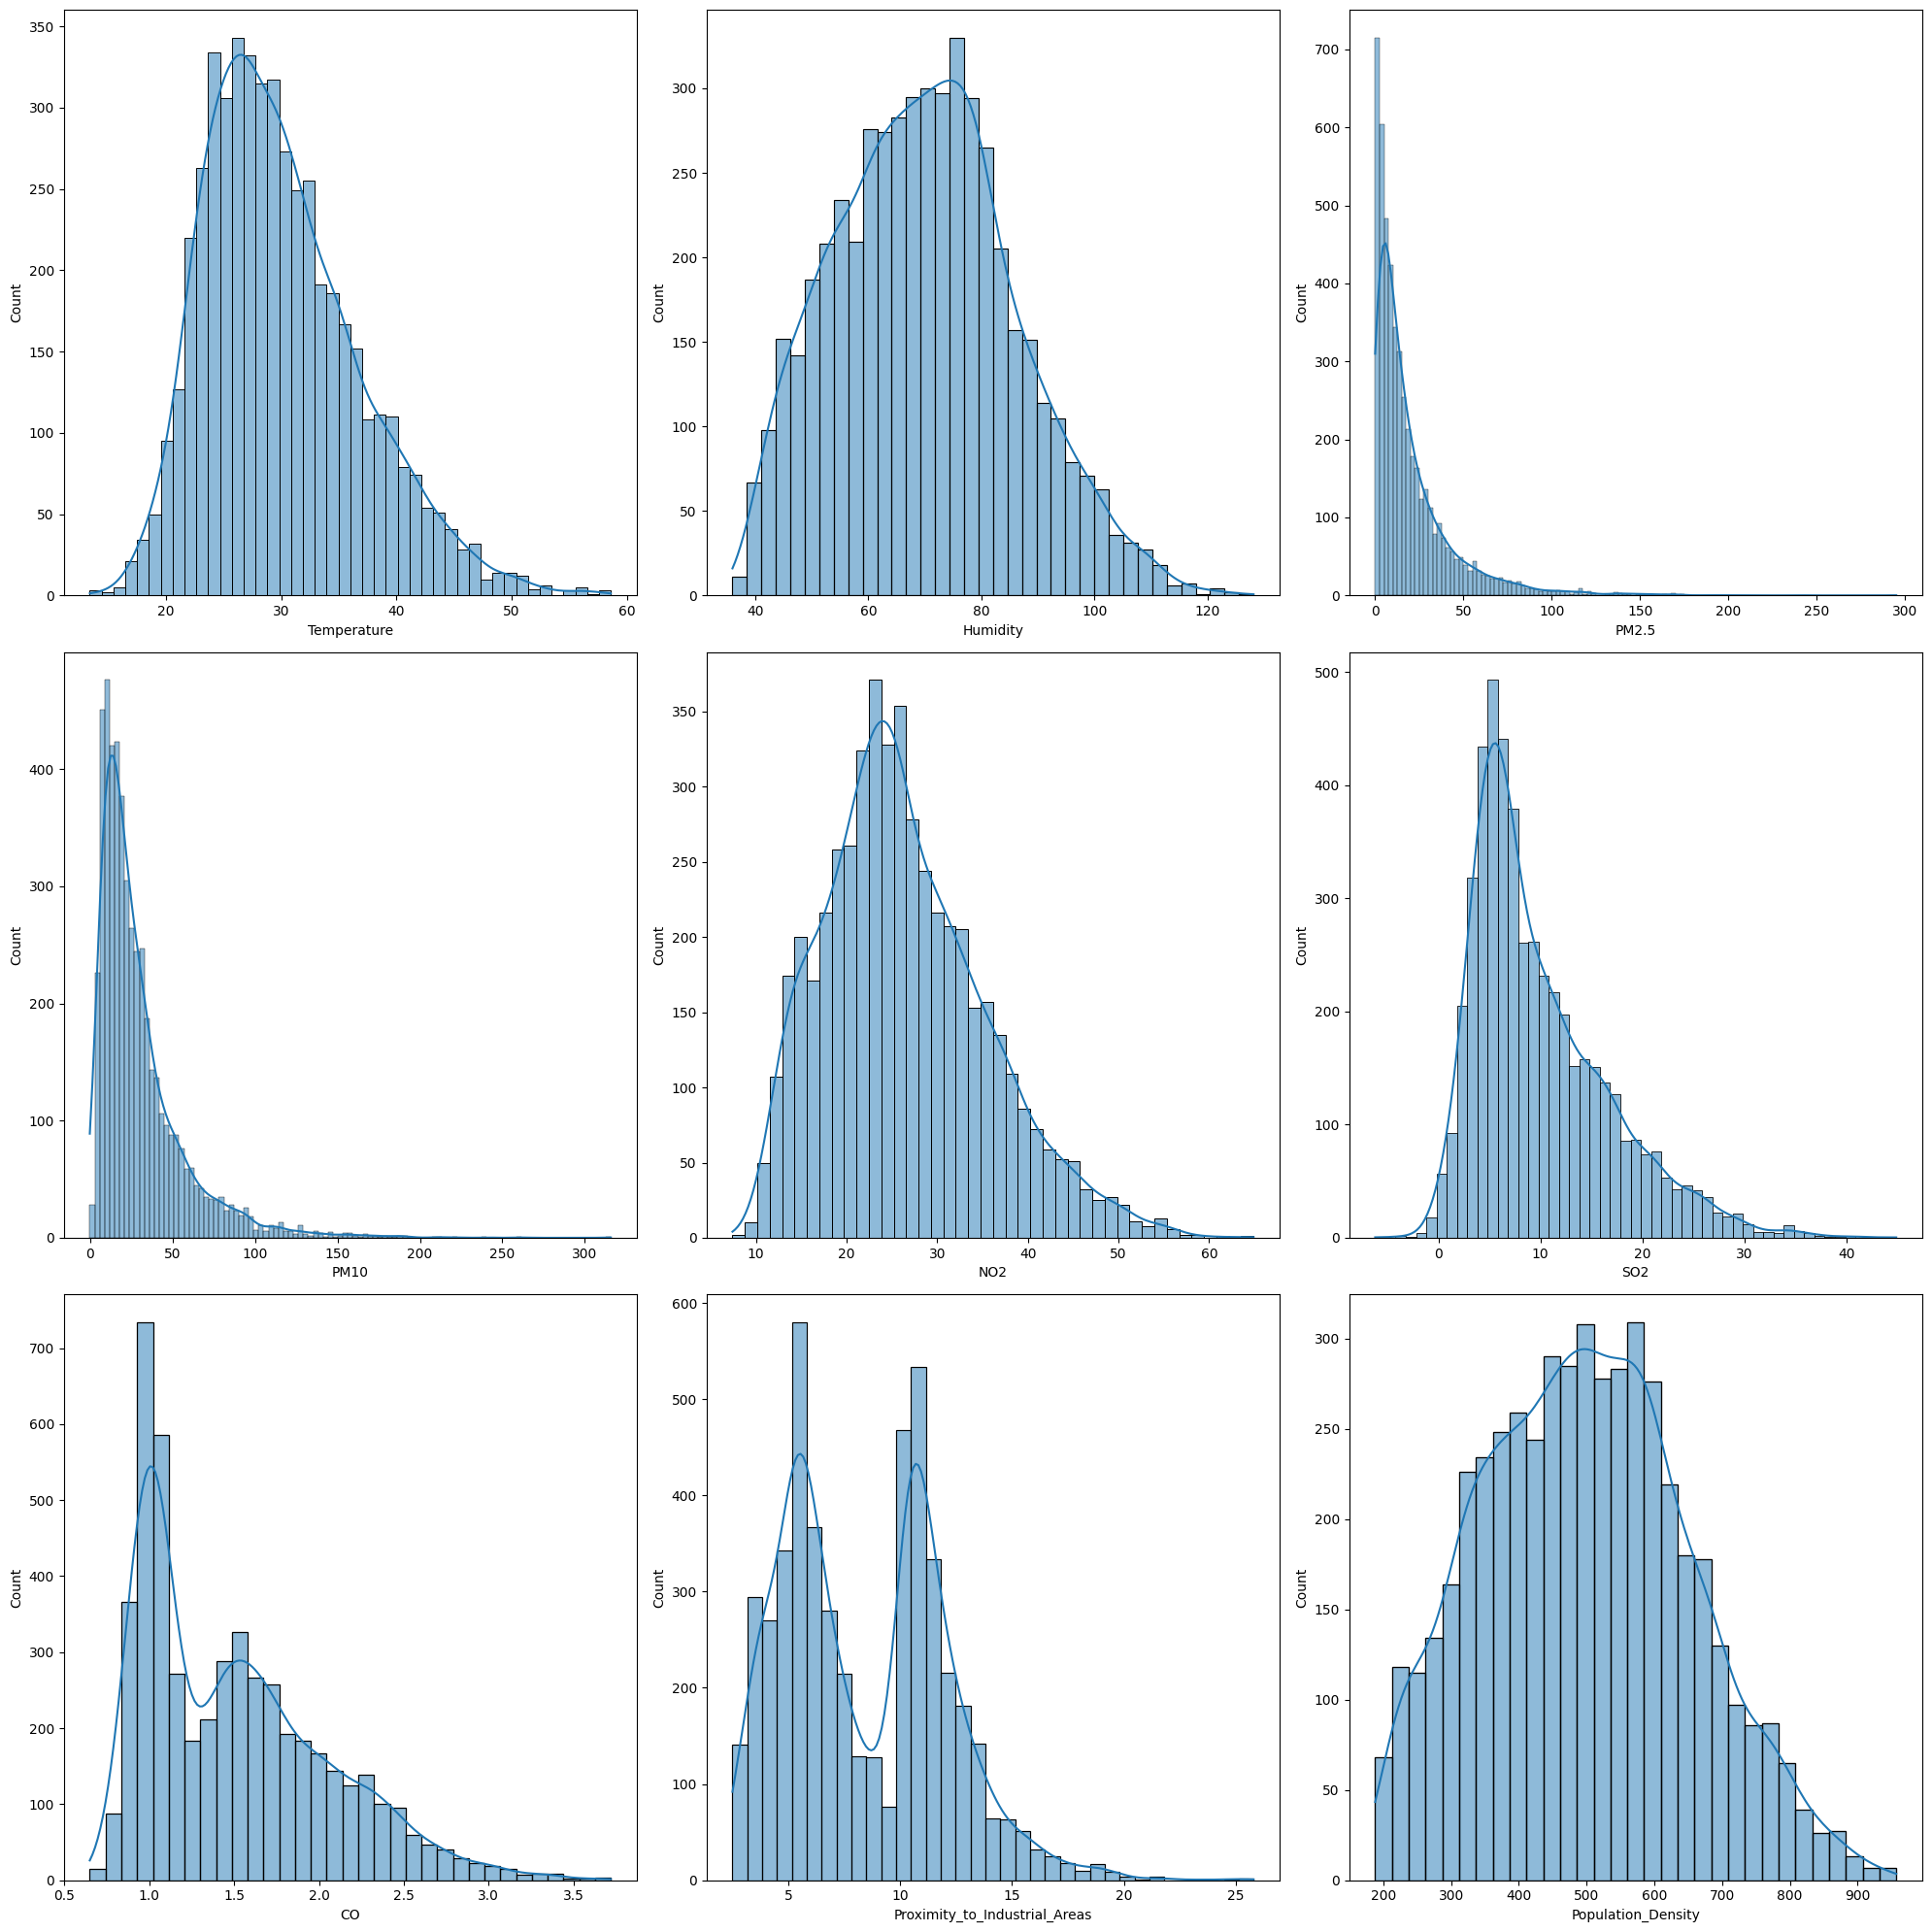

In [ ]:
# All of our columns other than our Target Variable is continuous in nature
# Let us visualize the distributions using Histograms

fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
i=0

for col in df.columns:
    if(col!='Air Quality'):
        sns.histplot(data=df,x=col,kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

**Findings:**

1. Temperature
   

* The distribution of temperature appears to be normal but slightly right-skewed.
* Most of the temperature values are concentrated between 20°C and 35°C.
* There are fewer occurrences of temperatures below 15°C and above 45°C, indicating outliers or rare events.


2. Humidity


* Humidity also shows a slight right-skewed distribution.
* The majority of the humidity values lie between 50% and 80%.
* Very high humidity values (above 100%) are relatively rare.


3. PM2.5


* PM2.5 levels have a highly skewed distribution with a concentration of values at the lower range.
* Most PM2.5 values fall under 0 to 50 micrograms/m³, suggesting lower pollution levels for most cases.
* However, some extreme values above 100+ indicate sporadic periods of high pollution.


4. PM10


* Similar to PM2.5, PM10 values show a right-skewed distribution.
* Most PM10 readings are concentrated between 0 and 50 micrograms/m³.
* A few values reach as high as 300, indicating rare but severe pollution episodes.


5. NO2 (Nitrogen Dioxide)


* The NO2 levels follow a right-skewed distribution.
* The majority of NO2 values lie between 10 and 40 micrograms/m³.
* Very high levels (>50) are uncommon, indicating pollution spikes.

6. CO (Carbon Monoxide)
   

* The distribution of CO is right-skewed.
* Most CO values are concentrated around 1.0 to 1.5.
* A smaller number of instances reach higher values, above 2.5, representing occasional spikes in CO levels.
* The skewness suggests occasional pollution events but a predominance of low CO levels.

7. Proximity to Industrial Areas


* The distribution of this variable appears to be bimodal (two peaks).
* One peak occurs around 5 units of proximity, and another peak is around 10 units.
* This bimodal behavior may indicate distinct clusters, possibly separating areas close and moderately far from industrial zones.
* Very few values exceed 15 units, suggesting that most data points represent locations relatively close to industrial areas.

8. Population Density


* Population density follows a normal-like distribution with slight skewness.
* The values are concentrated between 400 and 600, indicating typical population density for most regions in the dataset.
* The distribution tails off for lower densities (<300) and higher densities (>800), showing less frequent occurrences.




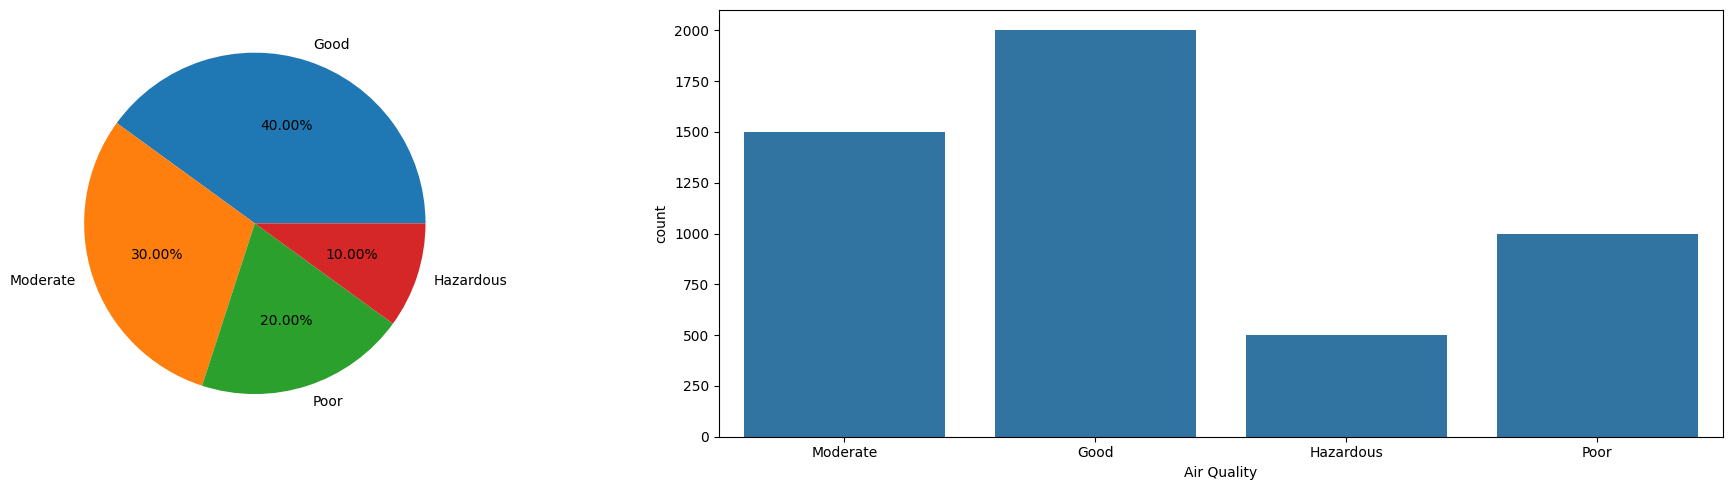

In [ ]:
# Now let us take a look at our Target Variable
fig,ax=plt.subplots(1,2,figsize=(20,5))

tdf=df['Air Quality'].value_counts().reset_index()
ax[0].pie(tdf['count'],labels=tdf[col],autopct='%.2f%%')
ax[0].set_aspect('equal')
sns.countplot(data=df,x=col,ax=ax[1])
plt.tight_layout()
plt.show()

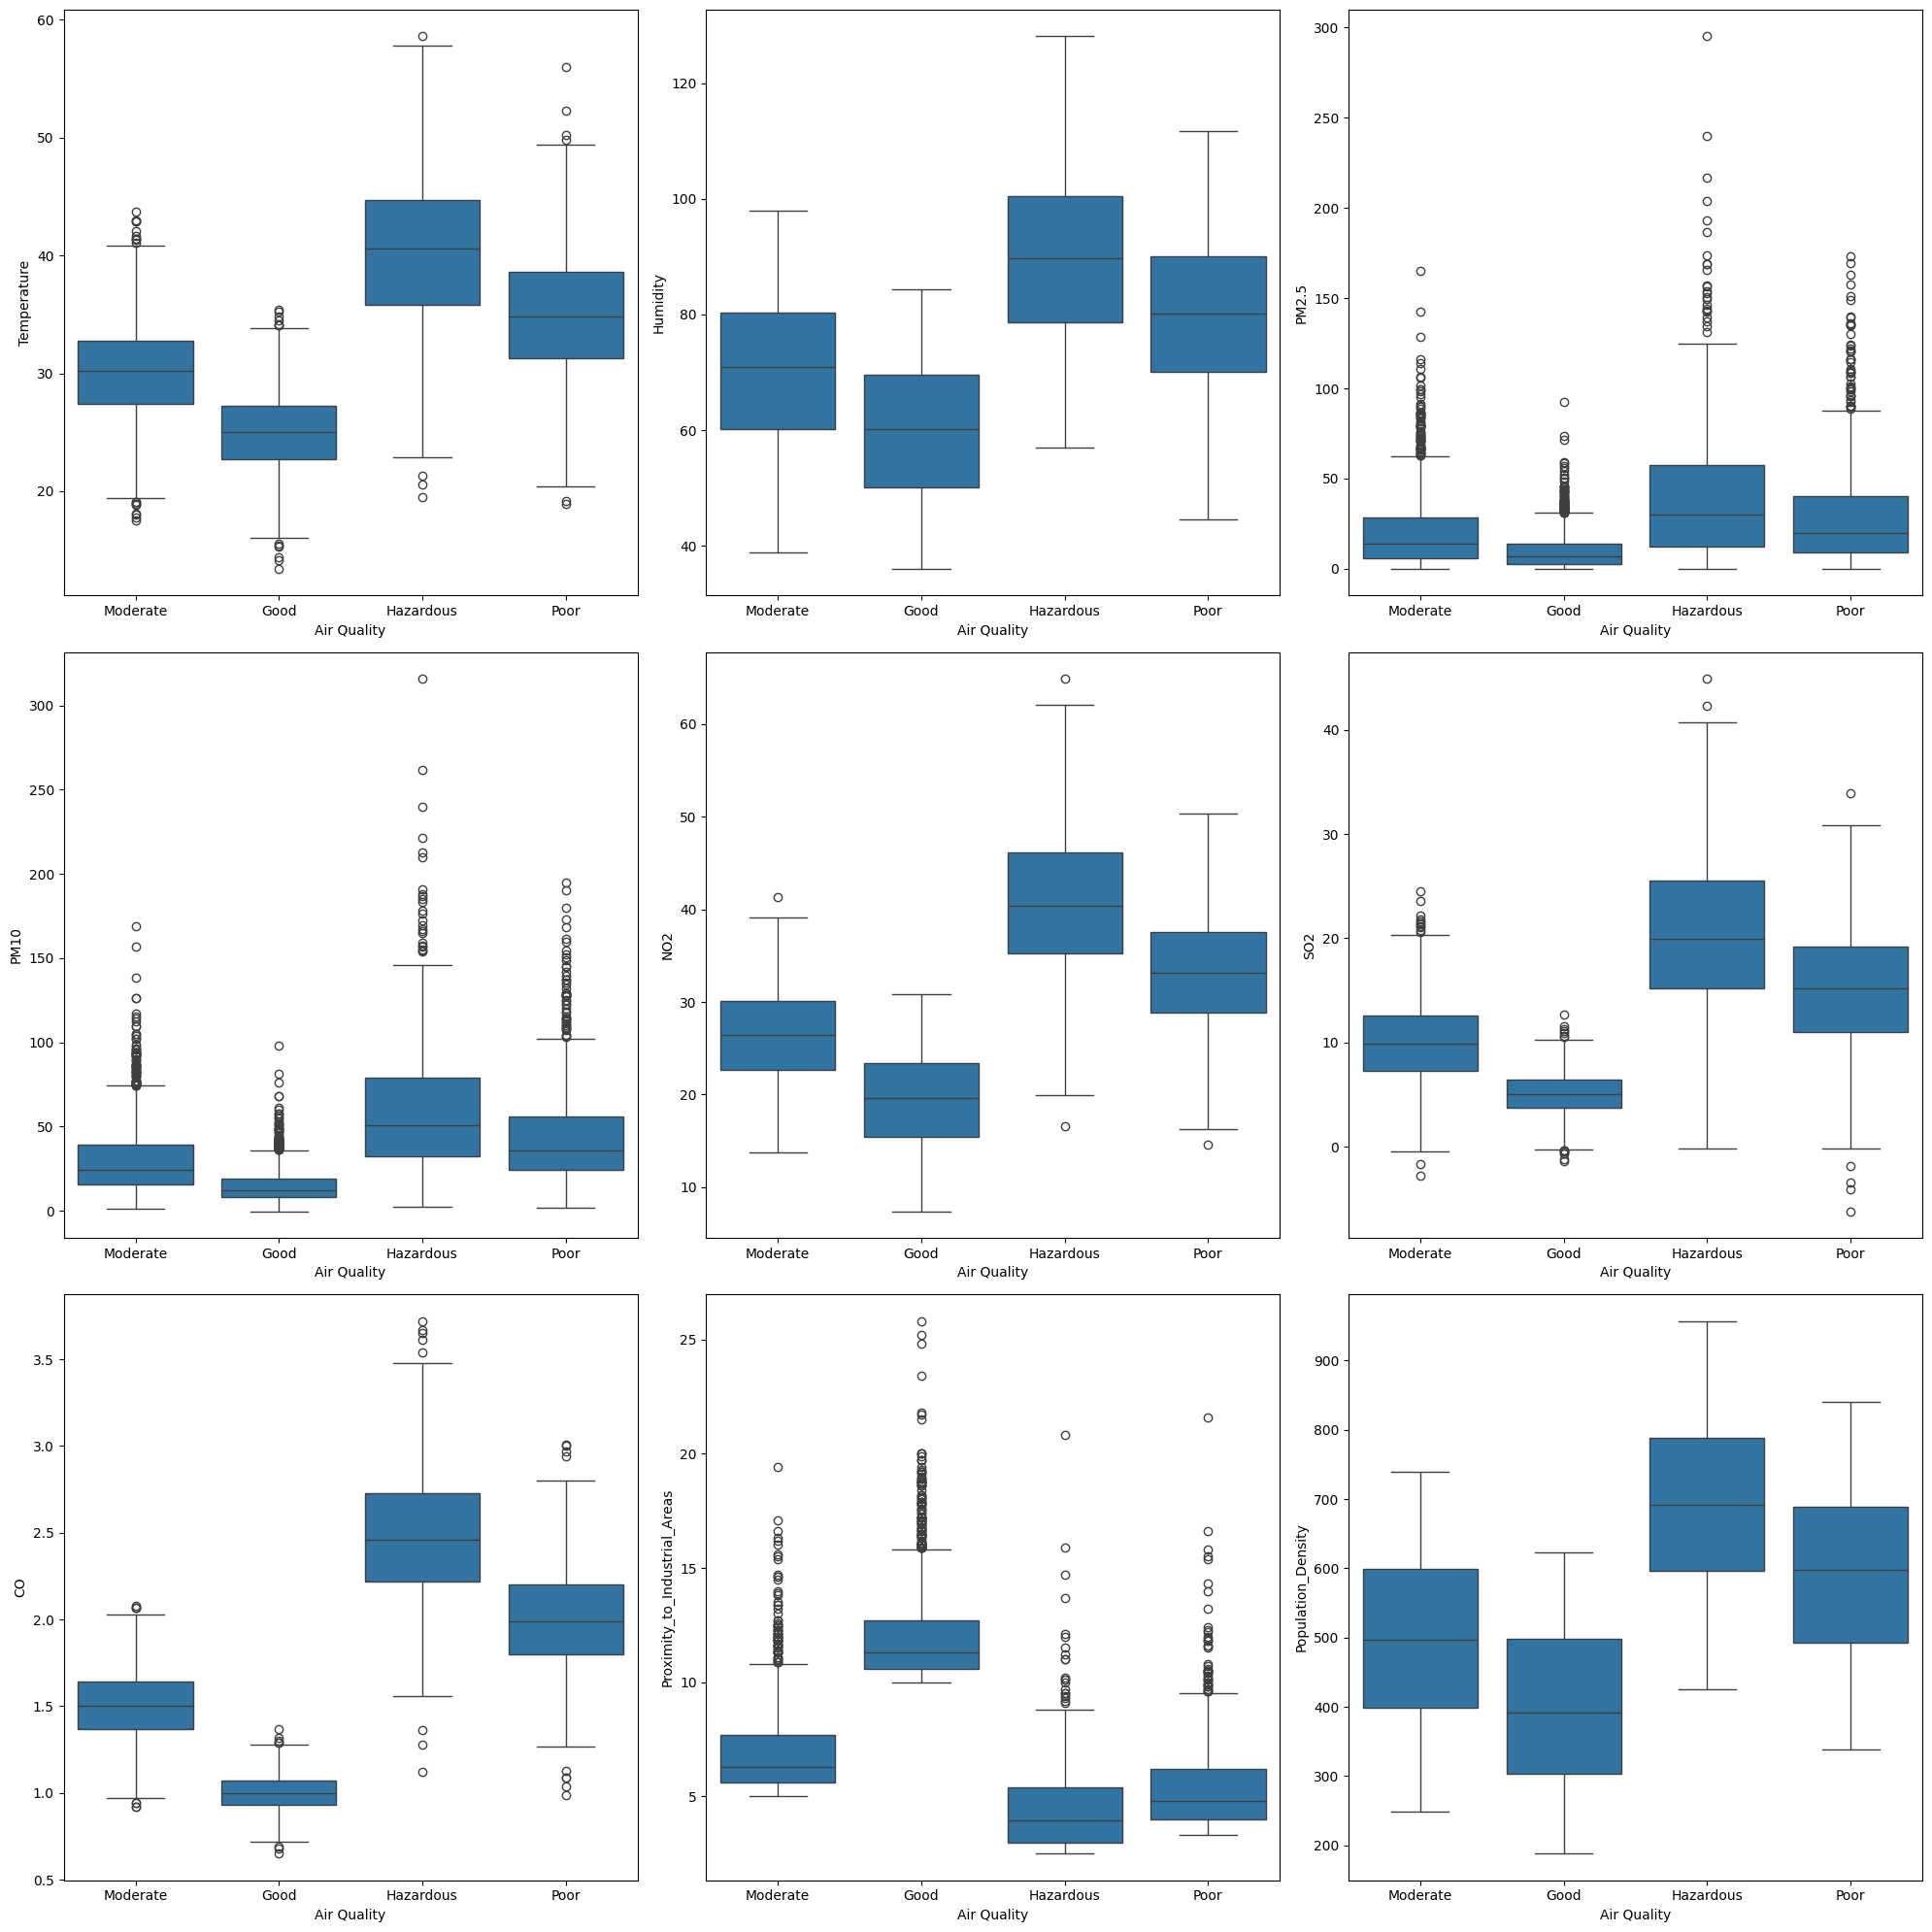

In [ ]:
# Looks like our target variable is unbalanced :(
# Let us look at how our features affect our target variable

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()
i = 0
cols=df.drop(columns='Air Quality')
for col in cols:
    sns.boxplot(data=df, x='Air Quality', y=col, ax=ax[i])
    i += 1
plt.tight_layout()
plt.show()

Box plots in the above section reveals that most features contain outliers that should be handled.

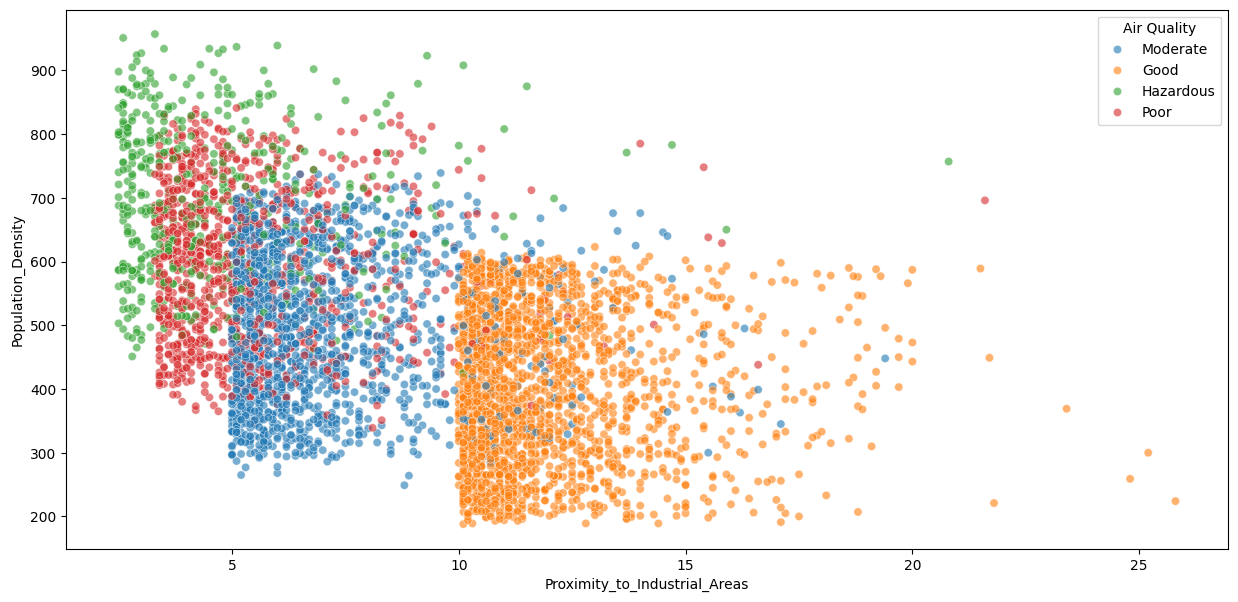

In [ ]:
# Now let us look at how many people live close by to industrial areas
# In other words we plot a scatter plot between Proximity to industrial areas and Population Density

plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='Proximity_to_Industrial_Areas',y='Population_Density',hue='Air Quality',alpha=0.6)
plt.show()

**The above Scatter Plot provides us with clear Explanations:**

1. People living closer to Industrial Areas get decreasing quality of Air Quality
2. In other words Industrial Areas Proximity is Inversely Proportional to Air Quality

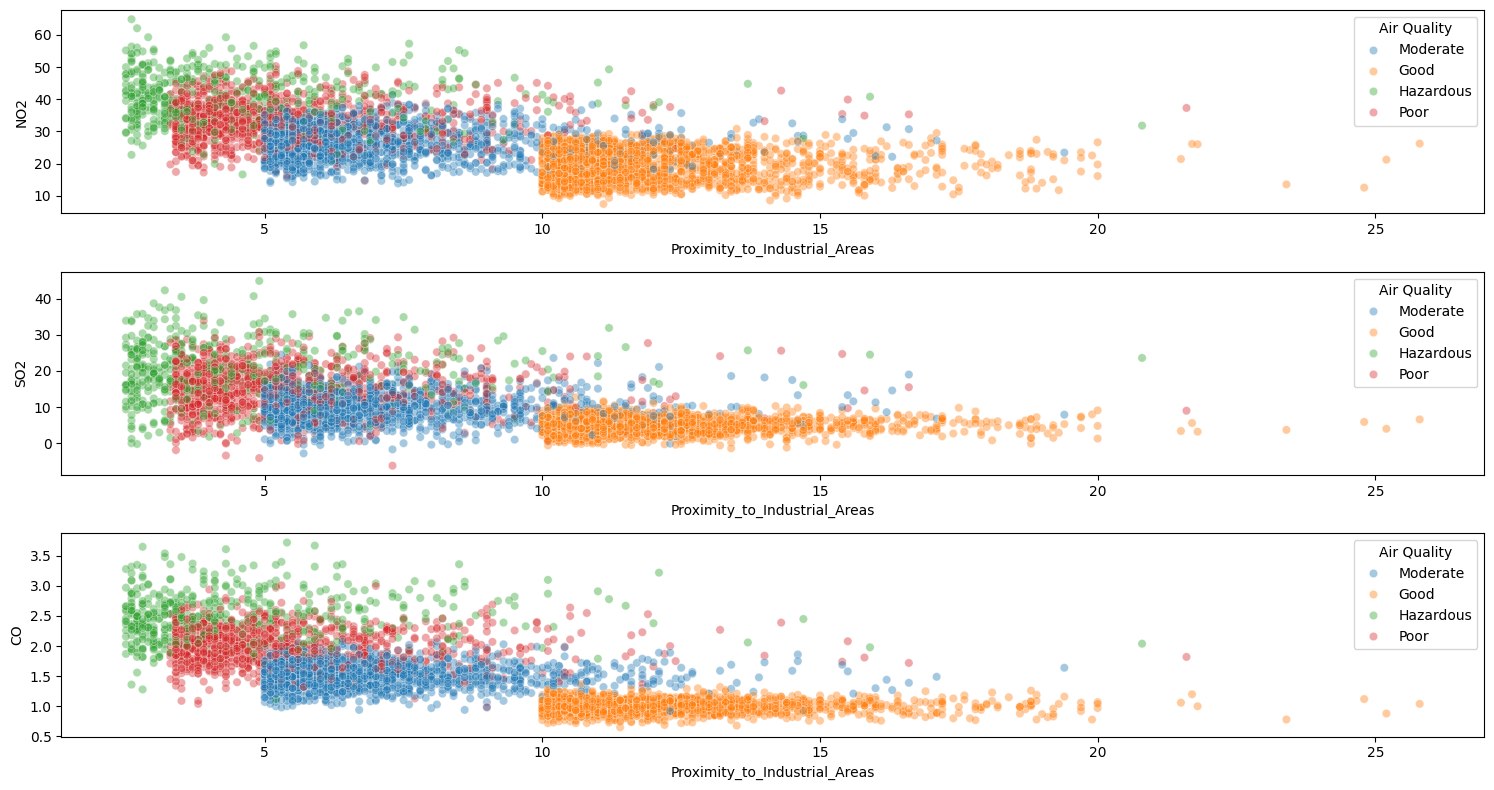

In [ ]:
# Now let us look at how NO2,SO2 and CO change based on the location of Industrial Areas

fig,ax=plt.subplots(3,1,figsize=(15,8))
sns.scatterplot(data=df,y='NO2',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[0],hue='Air Quality')
sns.scatterplot(data=df,y='SO2',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[1],hue='Air Quality')
sns.scatterplot(data=df,y='CO',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[2],hue='Air Quality')
plt.tight_layout()
plt.show()

**Impact of Proximity to Industrial Areas:**


* As the proximity to industrial areas increases, there is a noticeable decrease in concentrations of NO₂, SO₂, and CO.
* This suggests that industrial activities significantly influence air pollution levels in nearby areas.

**Air Quality Categories:**


* Poor and Hazardous air quality is predominantly observed at lower proximity values (closer to industrial areas), indicating higher pollution levels.
* As the distance from industrial areas increases, air quality improves, transitioning from hazardous/poor to moderate/good categories.


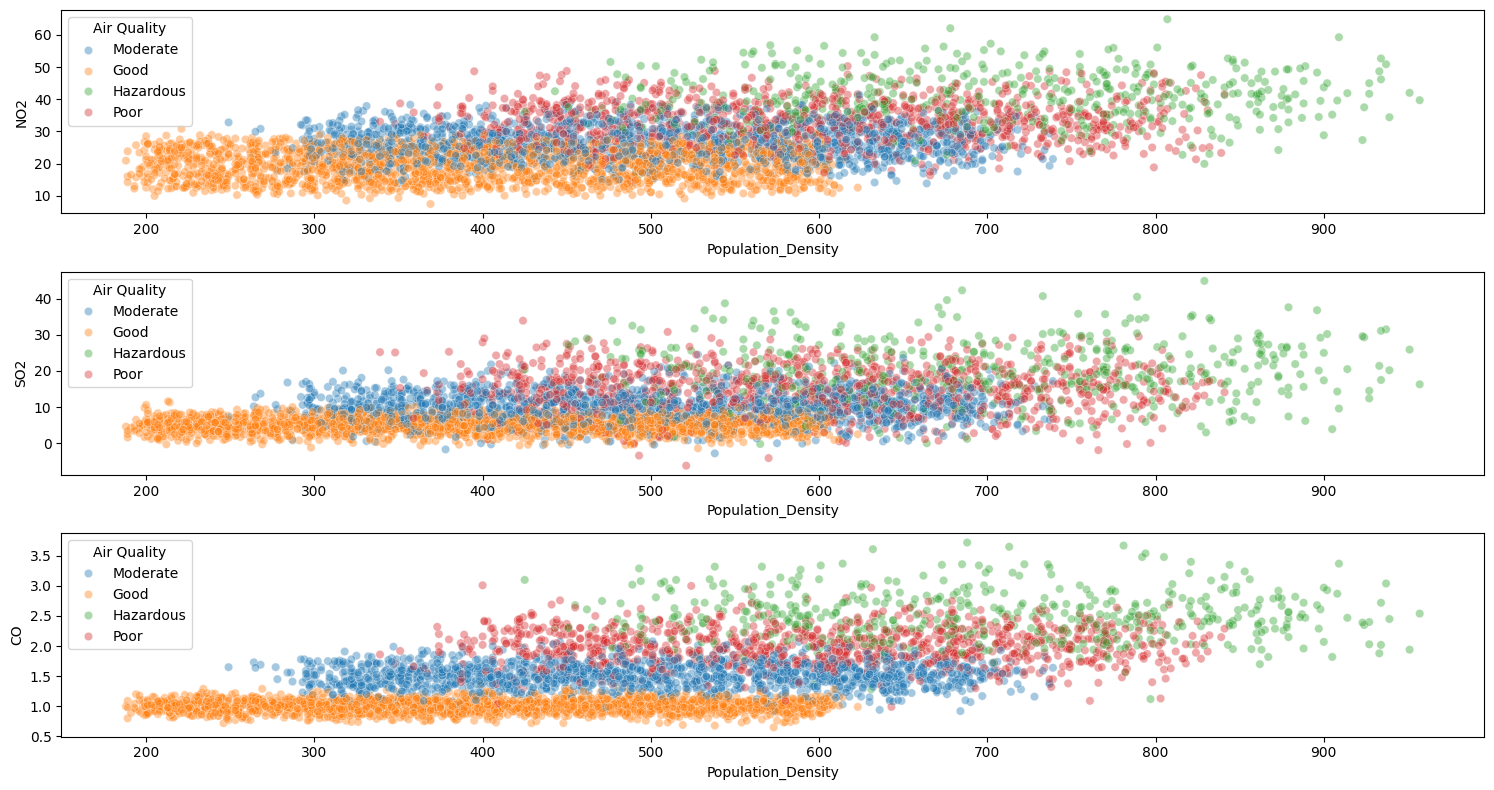

In [ ]:
# Let us look at how our gases vary based on Population and How that affects ourr Air Quality
fig,ax=plt.subplots(3,1,figsize=(15,8))
sns.scatterplot(data=df,y='NO2',x='Population_Density',alpha=0.4,ax=ax[0],hue='Air Quality')
sns.scatterplot(data=df,y='SO2',x='Population_Density',alpha=0.4,ax=ax[1],hue='Air Quality')
sns.scatterplot(data=df,y='CO',x='Population_Density',alpha=0.4,ax=ax[2],hue='Air Quality')
plt.tight_layout()
plt.show()

**Influence of Population Density:**


* As population density increases, there is a gradual rise in the concentration of pollutants (NO₂, SO₂, and CO).
* Higher population density is associated with increased industrial, vehicular, and domestic emissions, leading to worsening air quality.

**Air Quality Patterns:**


* Poor and hazardous air quality is more prevalent at moderate-to-high population densities, indicating the cumulative impact of human activity on pollution levels.
* Areas with low population density exhibit relatively better air quality (good and moderate), suggesting fewer pollution sources.

**Pollutant Behavior:**


* NO₂ Levels: Show a steady increase with population density, likely due to vehicular and industrial emissions in densely populated areas.
* SO₂ Levels: Display a similar pattern to NO₂, reflecting increased combustion activities in high-density regions.
* CO Levels: Although CO levels are generally lower, they follow the same upward trend with population density.



**There are more visualizations that can be done with the given data, the above are just some examples to understand the data better**

****
# Data Preprocessing and Feature Selection #
****
**No Feature will be created here only the Correlation and Mutual Information are calculated and Visualized**

In [ ]:
# importing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# Let us look at our data first
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
# Let us drop all the duplicate values
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
# Let us check if we have any null values
df.isnull().any()

,0
Temperature,False
Humidity,False
PM2.5,False
PM10,False
NO2,False
SO2,False
CO,False
Proximity_to_Industrial_Areas,False
Population_Density,False
Air Quality,False


In [ ]:
print(df['Air Quality'].unique())

['Moderate' 'Good' 'Hazardous' 'Poor']


In [ ]:
# No null values and no duplicates
# Now let us encode our target variable so that it can pass though the model
# We will be using a tree structure therefore let us Label Encode it

le=LabelEncoder()
df['Air Quality']=le.fit_transform(df['Air Quality'])

# Print the mapping of labels to numeric values
print("Classes in the original data and their encoded values:")
for original_label, encoded_value in zip(le.classes_, range(len(le.classes_))):
    print(f"{original_label} -> {encoded_value}")

Classes in the original data and their encoded values:
Good -> 0
Hazardous -> 1
Moderate -> 2
Poor -> 3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


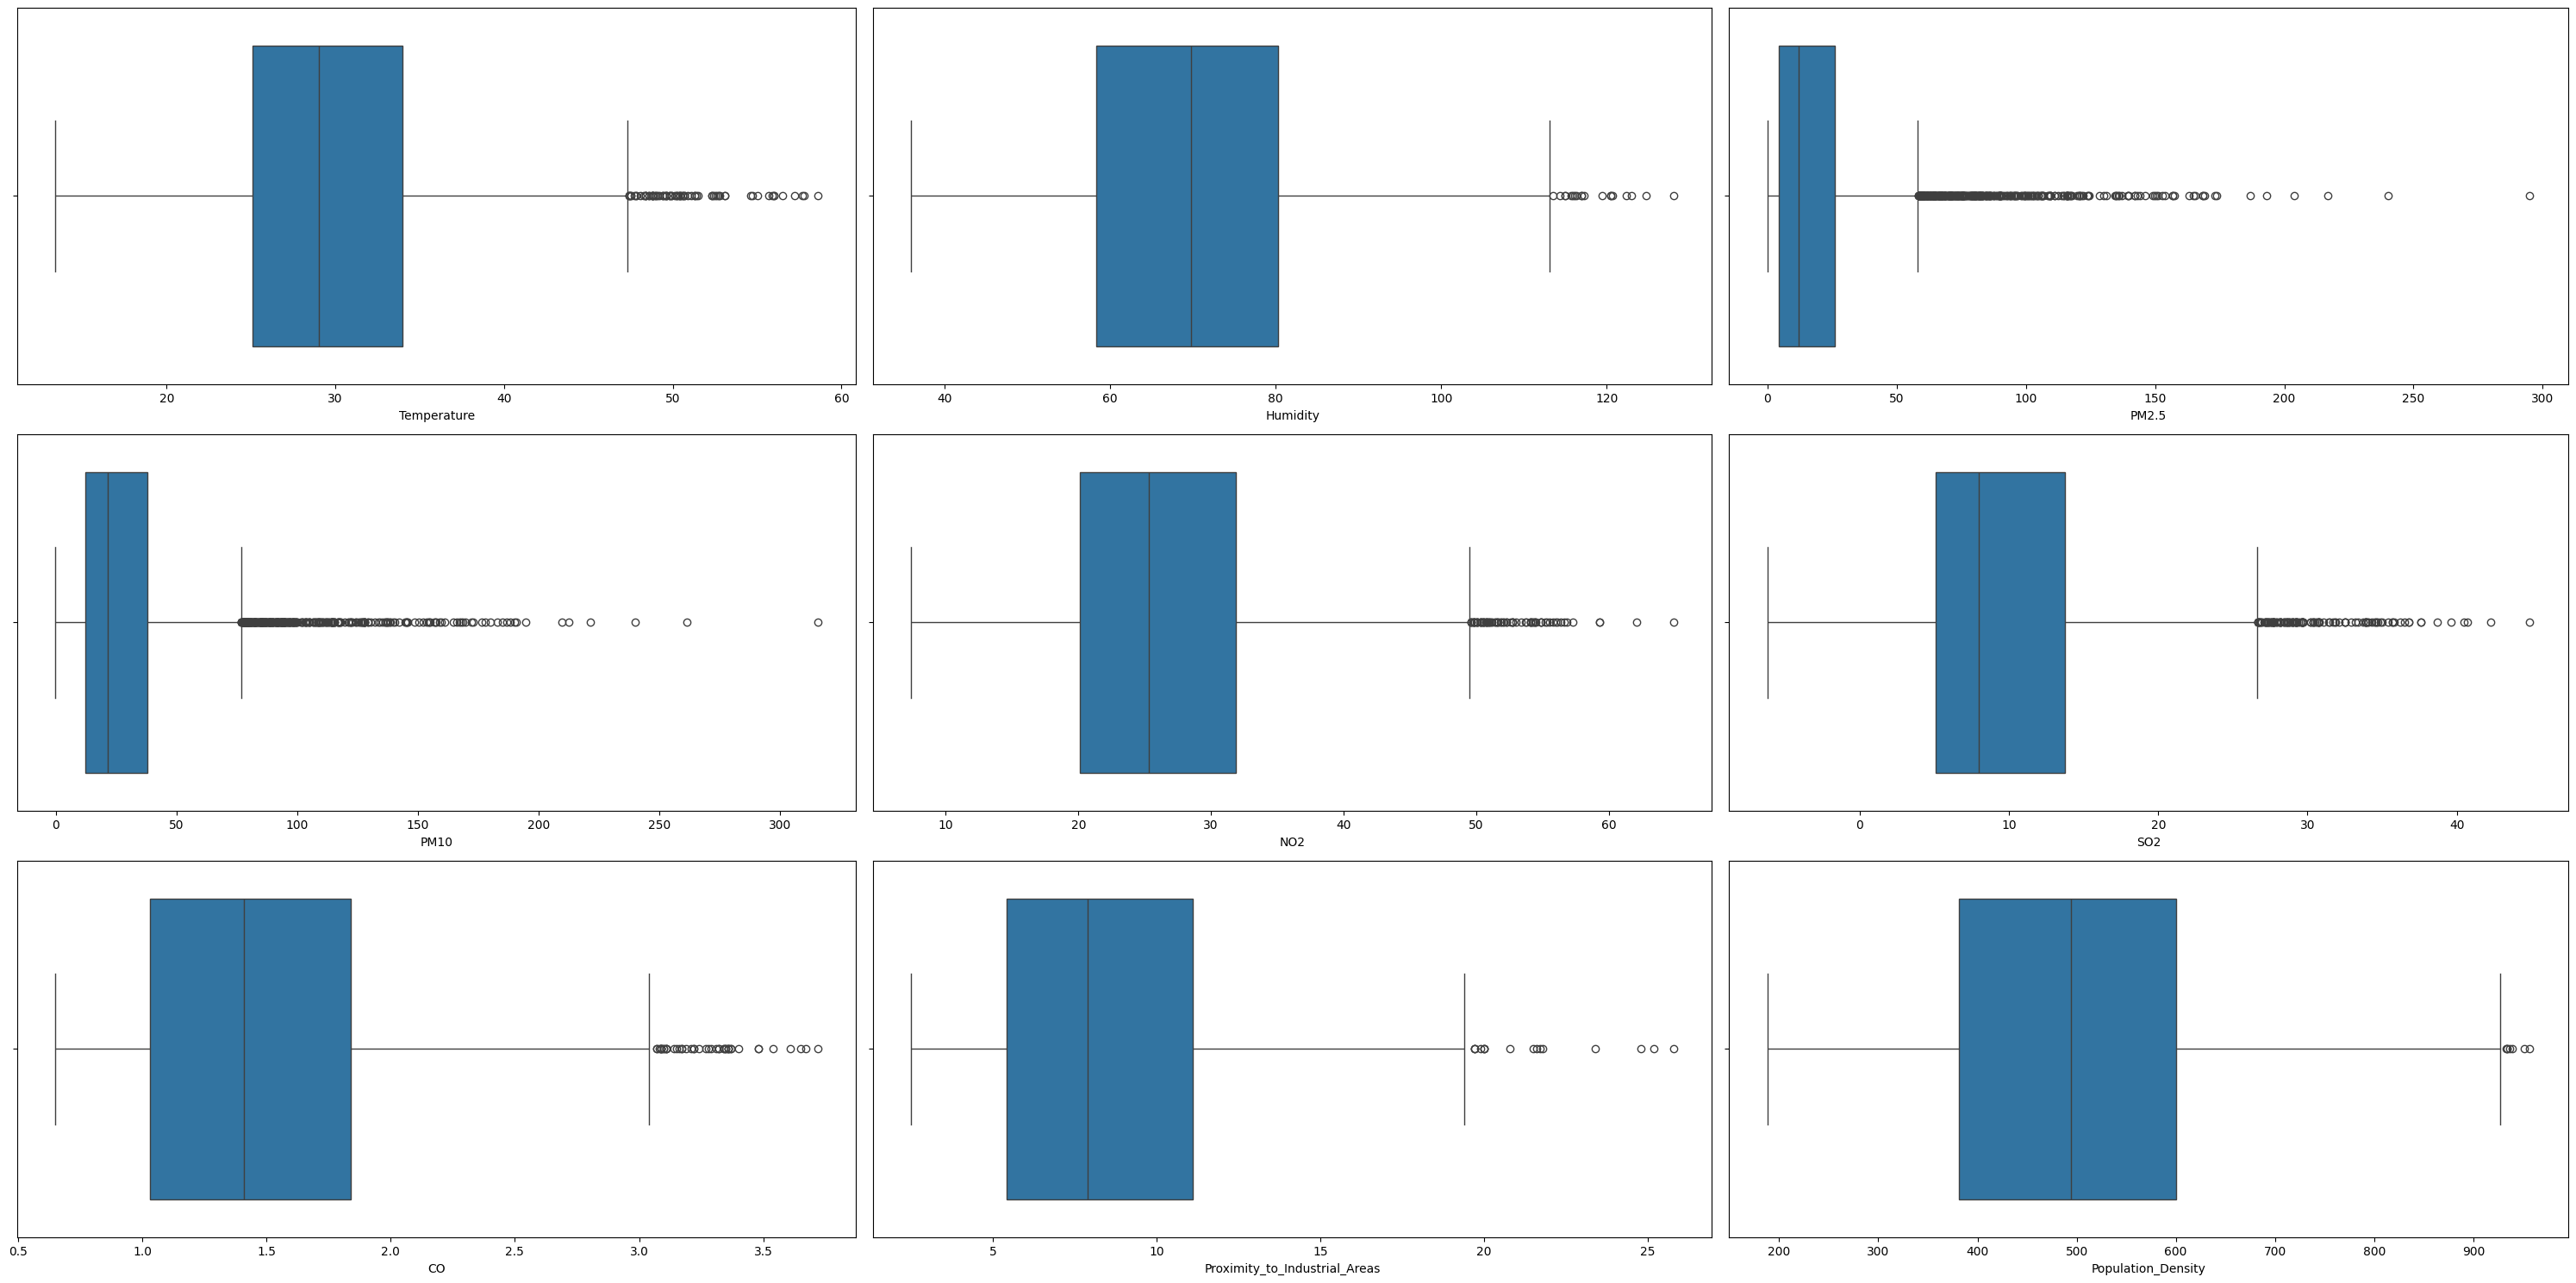

In [ ]:
# Let us look at the outliers our features hold and try to remove them
# To visualize the outliers let us use boxplots

fig,ax=plt.subplots(3,3,figsize=(30,15))
ax=ax.flatten()
i=0

for col in df.columns:
    if col!='Air Quality' and i<9:
        sns.boxplot(data=df,x=col,ax=ax[i])
        i+=1

plt.tight_layout()
plt.show()

In [ ]:
# We have Outliers in almost all our Features
# Let us remove it using Inter Quartile Range

for col in df.drop(columns='Air Quality').columns:
    q1=np.quantile(df[col],0.25)
    q3=np.quantile(df[col],0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+iqr*1.5
    df=df[(df[col]>=lb)&(df[col]<=ub)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


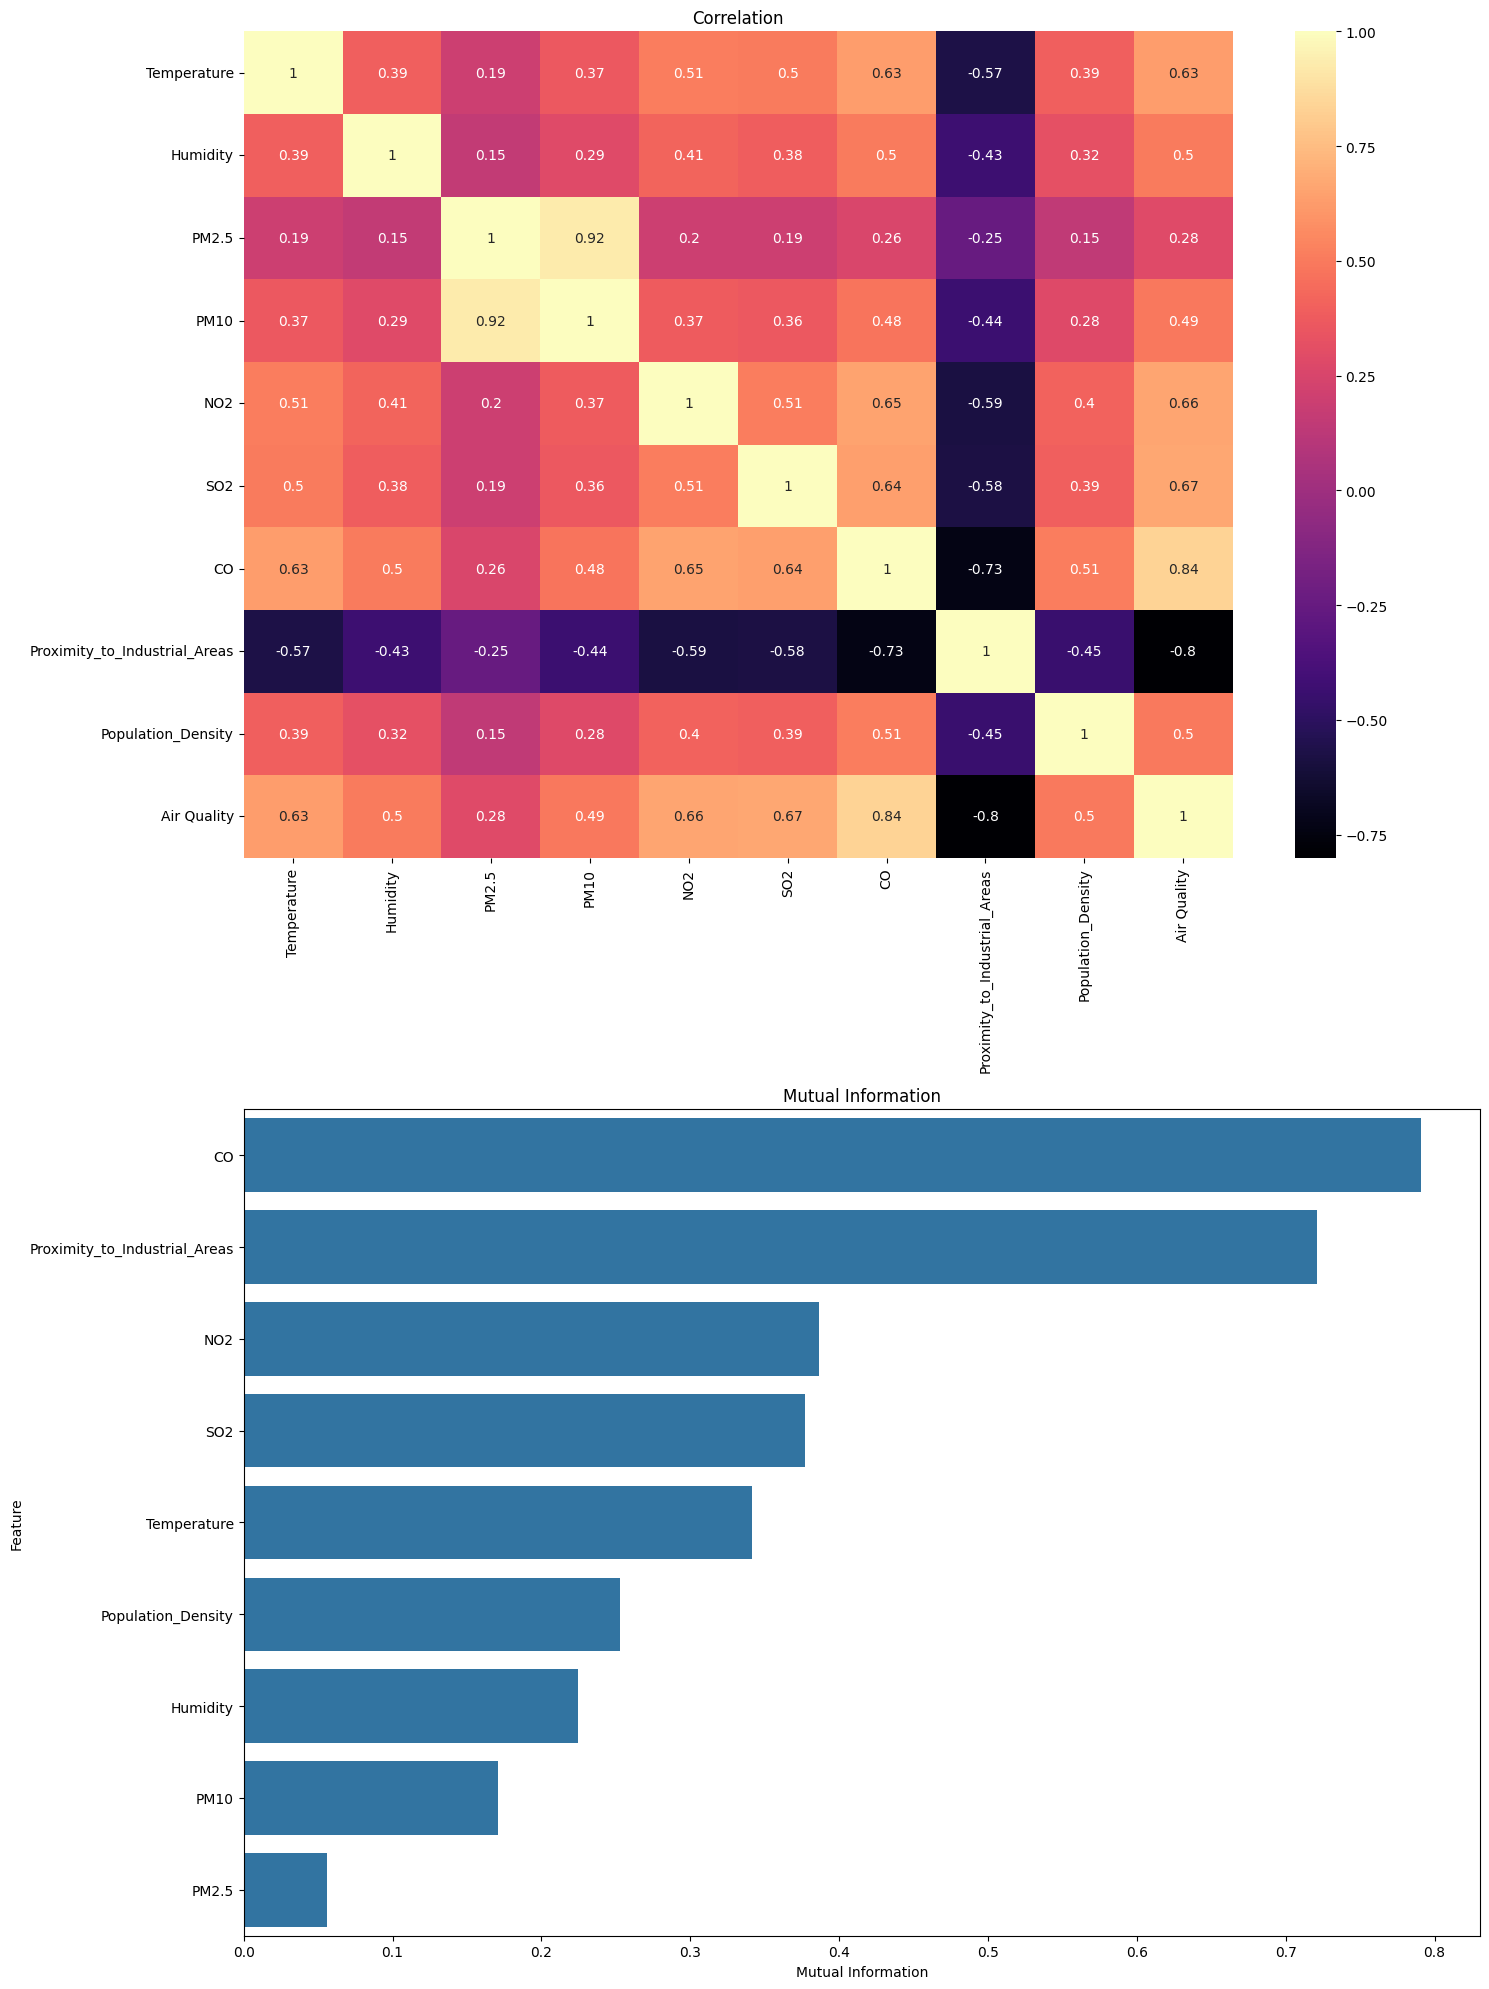

In [ ]:
# We have Removed all the Outliers :)

# Now Let us calculate Mutual information and then proceed to visualize correlation along with mutual information
# Calculating Mutual Information
tdf=df.copy()
x=tdf.drop(columns='Air Quality')
y=tdf['Air Quality']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Visualizing Mutual Information and correlation
fig,ax=plt.subplots(2,1,figsize=(15,20))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.show()

****
# Data Preparation #
****

In [ ]:
#importing
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset into features and target variables
# Splitting the features and target variables into training(75%) and testing set(25%)

x=df.drop(columns='Air Quality')
y=df['Air Quality']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)
print(x_t.shape,y_t.shape,x_te.shape,y_te.shape)

(3118, 9) (3118,) (1040, 9) (1040,)


****
# KNN #
****

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Standardize the dataset to ensure fair distance measurement
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_t, x_te, y_t, y_te = train_test_split(x_scaled, y, test_size=0.25, random_state=20)

# Define a dictionary of distance metrics and the corresponding KNN model parameters
metrics = ['euclidean', 'manhattan', 'cosine']
k_values = list(range(1, 10))  # Possible K values from 1 to 20

# Perform Grid Search with Cross-Validation for each distance metric
best_params = {}
best_scores = {}
performance_data = []

for metric in metrics:
    knn = KNeighborsClassifier(metric=metric)
    param_grid = {'n_neighbors': k_values}
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_t, y_t)

    # Store the best parameters and scores
    best_params[metric] = grid_search.best_params_
    best_scores[metric] = grid_search.best_score_

    # Evaluate the best model for each K and store performance metrics
    for k in k_values:
        knn_k = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_k.fit(x_t, y_t)
        y_pred = knn_k.predict(x_te)

        accuracy = accuracy_score(y_te, y_pred)
        precision = precision_score(y_te, y_pred, average='weighted')
        recall = recall_score(y_te, y_pred, average='weighted')
        f1 = f1_score(y_te, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_te, knn_k.predict_proba(x_te), multi_class='ovr') if hasattr(knn_k, "predict_proba") else None

        performance_data.append({
            'Metric': metric,
            'K': k,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })

# Convert performance data into a DataFrame and print
performance_df = pd.DataFrame(performance_data)
print(performance_df)

# Analyze Results
for metric, result in best_params.items():
    print(f"Metric: {metric}")
    print(f"Best K: {result['n_neighbors']}")
    print(f"Cross-Validation Accuracy: {best_scores[metric]:.4f}")

# Discussion Questions
# 1. How do different distance metrics affect the classification performance?
# 2. What is the best value of K for your dataset, and why?

       Metric  K  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0   euclidean  1  0.925962   0.926190  0.925962  0.925236  0.860627
1   euclidean  2  0.911538   0.918832  0.911538  0.909486  0.883027
2   euclidean  3  0.939423   0.937425  0.939423  0.936979  0.888995
3   euclidean  4  0.928846   0.928278  0.928846  0.925569  0.922248
4   euclidean  5  0.935577   0.931736  0.935577  0.932013  0.932876
5   euclidean  6  0.932692   0.930810  0.932692  0.929563  0.941711
6   euclidean  7  0.936538   0.932000  0.936538  0.932230  0.951272
7   euclidean  8  0.934615   0.931604  0.934615  0.930747  0.953400
8   euclidean  9  0.944231   0.941404  0.944231  0.940693  0.953807
9   manhattan  1  0.927885   0.927032  0.927885  0.926360  0.879813
10  manhattan  2  0.915385   0.923311  0.915385  0.912952  0.900525
11  manhattan  3  0.935577   0.933156  0.935577  0.932711  0.927760
12  manhattan  4  0.936538   0.935506  0.936538  0.932811  0.943736
13  manhattan  5  0.945192   0.942534  0.945192 

****
# Logistic Regression #
****

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with L1 and L2 Regularization
logistic_performance_data = []
regularizations = ['l1', 'l2']

for reg in regularizations:
    for c in [0.01, 0.1, 1, 10, 100]:  # Regularization strength
        logistic = LogisticRegression(penalty=reg, solver='saga', max_iter=5000, multi_class='multinomial', C=c)
        logistic.fit(x_t, y_t)
        y_pred = logistic.predict(x_te)

        accuracy = accuracy_score(y_te, y_pred)
        precision = precision_score(y_te, y_pred, average='weighted')
        recall = recall_score(y_te, y_pred, average='weighted')
        f1 = f1_score(y_te, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_te, logistic.predict_proba(x_te), multi_class='ovr')

        logistic_performance_data.append({
            'Regularization': reg,
            'C': c,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })

# Convert Logistic Regression performance data into a DataFrame
logistic_performance_df = pd.DataFrame(logistic_performance_data)
print("Performance for all values of C:")
print(logistic_performance_df)

# Find the best performance for L1 and L2 regularization
best_l1 = logistic_performance_df[logistic_performance_df['Regularization'] == 'l1'].sort_values(by='Accuracy', ascending=False).iloc[0]
best_l2 = logistic_performance_df[logistic_performance_df['Regularization'] == 'l2'].sort_values(by='Accuracy', ascending=False).iloc[0]

print("\nBest performance for L1 Regularization:")
print(best_l1)

print("\nBest performance for L2 Regularization:")
print(best_l2)

# Discussion Questions
# 1. How do different distance metrics affect the classification performance?
# 2. What is the best value of K for your dataset, and why?
# 3. How does Logistic Regression compare to KNN in terms of performance?

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performance for all values of C:
  Regularization       C  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0             l1    0.01  0.910577   0.900206  0.910577  0.900616  0.878669
1             l1    0.10  0.951923   0.948740  0.951923  0.949024  0.986895
2             l1    1.00  0.952885   0.951536  0.952885  0.951625  0.989039
3             l1   10.00  0.952885   0.952068  0.952885  0.951886  0.989006
4             l1  100.00  0.952885   0.952068  0.952885  0.951886  0.988992
5             l2    0.01  0.927885   0.915599  0.927885  0.920449  0.979910
6             l2    0.10  0.950962   0.948739  0.950962  0.947809  0.987158
7             l2    1.00  0.952885   0.950542  0.952885  0.951095  0.988908
8             l2   10.00  0.953846   0.953081  0.953846  0.952856  0.989055
9             l2  100.00  0.952885   0.952068  0.952885  0.951886  0.988999

Best performance for L1 Regularization:
Regularization          l1
C                      1.0
Accuracy          0.952885
Precision

In [ ]:
# importing
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [ ]:
# print("Training Evalaution Metrics:")
# print("Accuracy: ",accuracy_score(y_t,predt))
# print("Precision: ",precision_score(y_t,predt,average='micro'))
# print("Recall: ",recall_score(y_t,predt,average='micro'))
# print("F1 Score: ",f1_score(y_t,predt,average='micro'))
# print("\nClassification Report: \n",classification_report(y_t,predt))
# print("\nConfusion Matrix: \n")
# plt.figure(figsize=(15,5))
# sns.heatmap(confusion_matrix(y_t,predt),annot=True,fmt='d')
# plt.show()

# SVM


Kernel: linear
Accuracy: 0.9538
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       483
           1       0.50      0.46      0.48        13
           2       0.93      0.98      0.95       366
           3       0.92      0.83      0.87       178

    accuracy                           0.95      1040
   macro avg       0.84      0.82      0.82      1040
weighted avg       0.95      0.95      0.95      1040



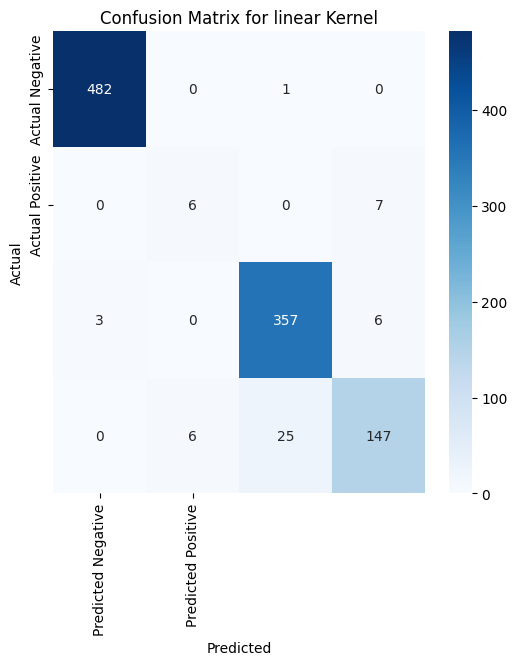

Kernel: poly
Accuracy: 0.9404
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       483
           1       0.42      0.38      0.40        13
           2       0.91      0.97      0.94       366
           3       0.92      0.79      0.85       178

    accuracy                           0.94      1040
   macro avg       0.81      0.78      0.79      1040
weighted avg       0.94      0.94      0.94      1040



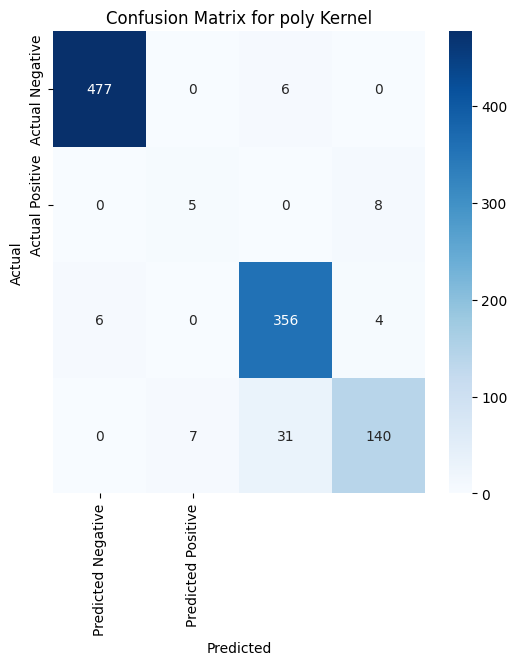

Kernel: rbf
Accuracy: 0.9529
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       483
           1       0.67      0.31      0.42        13
           2       0.92      0.98      0.95       366
           3       0.91      0.82      0.86       178

    accuracy                           0.95      1040
   macro avg       0.87      0.78      0.81      1040
weighted avg       0.95      0.95      0.95      1040



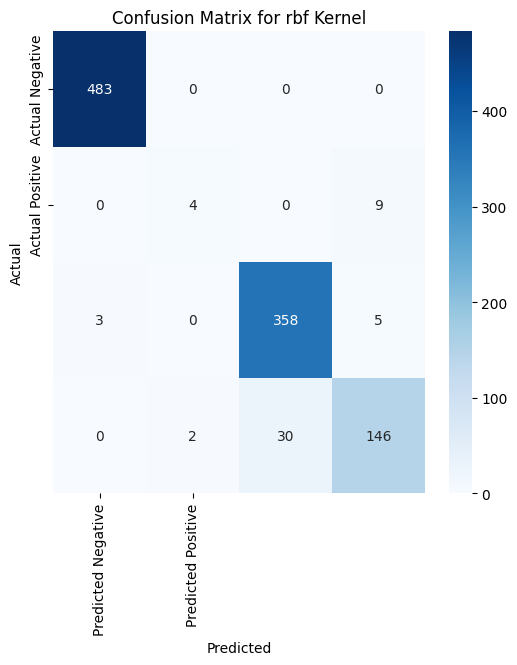


Comparison of Kernels Performance:

Linear Kernel:
Accuracy: 0.9538
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       483
           1       0.50      0.46      0.48        13
           2       0.93      0.98      0.95       366
           3       0.92      0.83      0.87       178

    accuracy                           0.95      1040
   macro avg       0.84      0.82      0.82      1040
weighted avg       0.95      0.95      0.95      1040


Poly Kernel:
Accuracy: 0.9404
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       483
           1       0.42      0.38      0.40        13
           2       0.91      0.97      0.94       366
           3       0.92      0.79      0.85       178

    accuracy                           0.94      1040
   macro avg       0.81      0.78      0.79      1040
weighted avg       0.94      0.94      

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train SVM models with different kernels and evaluate
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    # Initialize SVM with the current kernel
    svm = SVC(kernel=kernel, random_state=20)

    # Train the model
    svm.fit(x_t, y_t)

    # Predict on the test data
    y_pred = svm.predict(x_te)

    # Evaluate the model
    accuracy = accuracy_score(y_te, y_pred)
    class_report = classification_report(y_te, y_pred)
    conf_matrix = confusion_matrix(y_te, y_pred)

    # Store results
    results[kernel] = {'accuracy': accuracy, 'class_report': class_report, 'conf_matrix': conf_matrix}

    # Print metrics for each kernel
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", class_report)

    # Plot Confusion Matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f"Confusion Matrix for {kernel} Kernel")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Compare the performance of kernels
print("\nComparison of Kernels Performance:")
for kernel, result in results.items():
    print(f"\n{kernel.capitalize()} Kernel:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Classification Report:\n{result['class_report']}")



Kernel: linear
Accuracy: 0.9519
ROC-AUC: 0.9941
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       483
           1       0.50      0.46      0.48        13
           2       0.93      0.97      0.95       366
           3       0.92      0.83      0.87       178

    accuracy                           0.95      1040
   macro avg       0.84      0.81      0.82      1040
weighted avg       0.95      0.95      0.95      1040



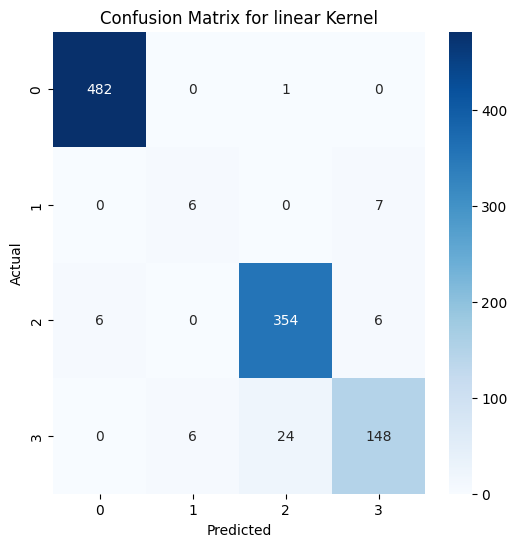

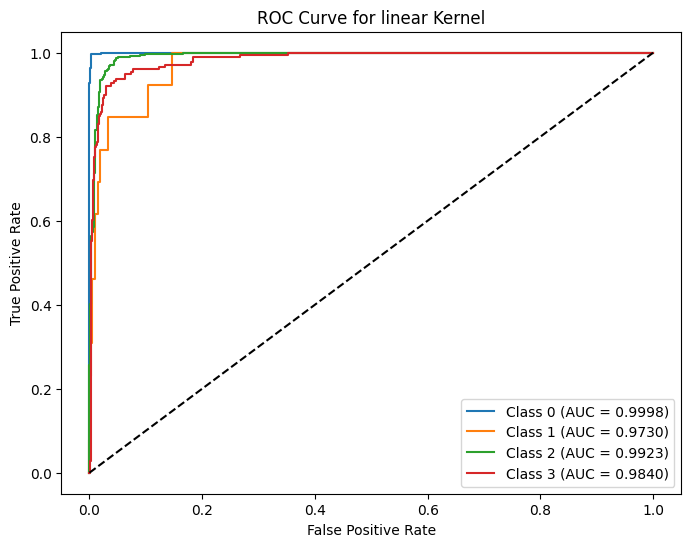

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: poly
Accuracy: 0.7923
ROC-AUC: 0.9508
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       483
           1       0.00      0.00      0.00        13
           2       0.73      0.70      0.72       366
           3       0.78      0.53      0.63       178

    accuracy                           0.79      1040
   macro avg       0.59      0.55      0.56      1040
weighted avg       0.78      0.79      0.78      1040



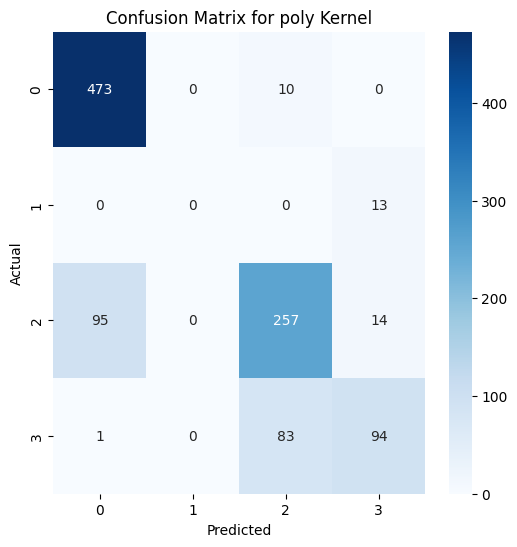

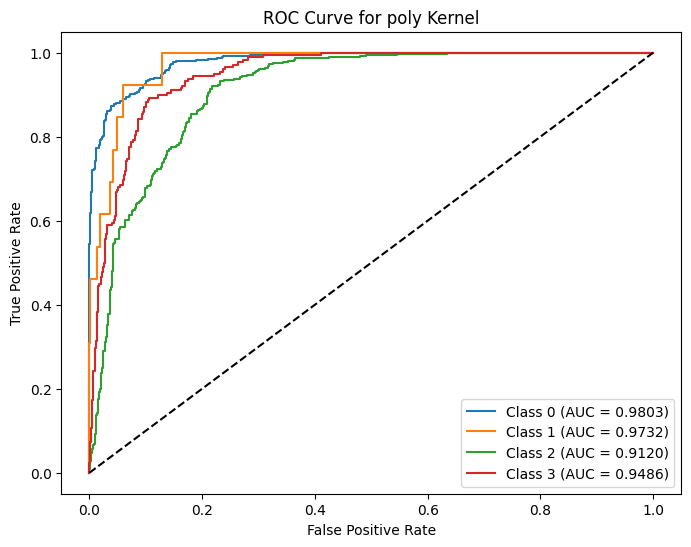

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: rbf
Accuracy: 0.7798
ROC-AUC: 0.9389
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       483
           1       0.00      0.00      0.00        13
           2       0.68      0.76      0.72       366
           3       0.77      0.40      0.53       178

    accuracy                           0.78      1040
   macro avg       0.58      0.53      0.54      1040
weighted avg       0.77      0.78      0.76      1040



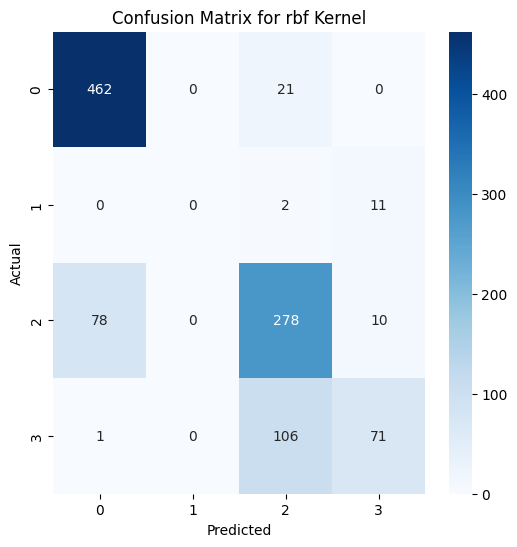

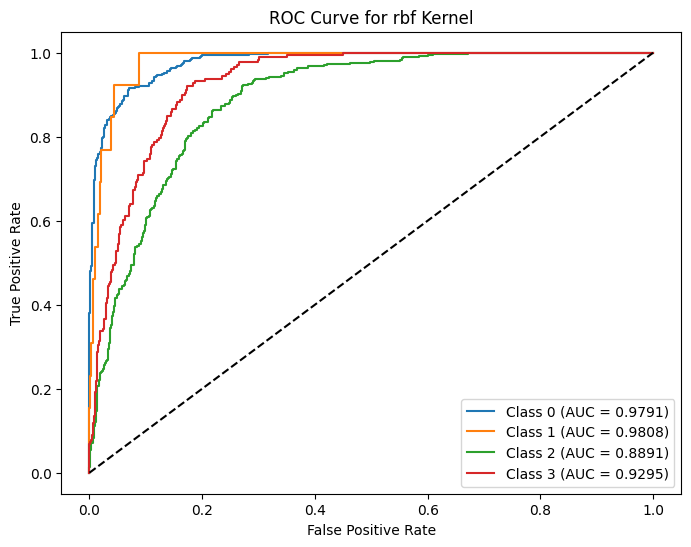


Comparison of Kernels Performance:

Linear Kernel:
Accuracy: 0.9519
ROC-AUC: 0.9941
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       483
           1       0.50      0.46      0.48        13
           2       0.93      0.97      0.95       366
           3       0.92      0.83      0.87       178

    accuracy                           0.95      1040
   macro avg       0.84      0.81      0.82      1040
weighted avg       0.95      0.95      0.95      1040


Poly Kernel:
Accuracy: 0.7923
ROC-AUC: 0.9508
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       483
           1       0.00      0.00      0.00        13
           2       0.73      0.70      0.72       366
           3       0.78      0.53      0.63       178

    accuracy                           0.79      1040
   macro avg       0.59      0.55      0.56      1040
weighte

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Train SVM models with different kernels and evaluate
kernels = ['linear', 'poly', 'rbf']
results = {}

# Assuming this is a multi-class problem, binarize the labels for ROC-AUC calculation
y_te_binarized = label_binarize(y_te, classes=list(set(y_t)))  # Ensure classes match those in training
x_classes = y_te_binarized.shape[1]

for kernel in kernels:
    # Initialize SVM with the current kernel
    svm = SVC(kernel=kernel, probability=True, random_state=20)

    # Train the model
    svm.fit(x_t, y_t)

    # Predict on the test data
    y_pred = svm.predict(x_te)
    y_proba = svm.predict_proba(x_te)  # Probabilities for ROC-AUC

    # Evaluate the model
    accuracy = accuracy_score(y_te, y_pred)
    class_report = classification_report(y_te, y_pred)
    conf_matrix = confusion_matrix(y_te, y_pred)

    # Calculate ROC-AUC
    if x_classes > 2:  # Multi-class ROC-AUC
        roc_auc = roc_auc_score(y_te_binarized, y_proba, average="weighted", multi_class="ovr")
    else:  # Binary ROC-AUC
        roc_auc = roc_auc_score(y_te, y_proba[:, 1])

    # Store results
    results[kernel] = {'accuracy': accuracy, 'class_report': class_report, 'conf_matrix': conf_matrix, 'roc_auc': roc_auc}

    # Print metrics for each kernel
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Classification Report:\n", class_report)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(set(y_t)), yticklabels=list(set(y_t)))
    plt.title(f"Confusion Matrix for {kernel} Kernel")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    if x_classes > 2:
        for i in range(x_classes):
            fpr, tpr, _ = roc_curve(y_te_binarized[:, i], y_proba[:, i])
            plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc(fpr, tpr):.4f})")
    else:
        fpr, tpr, _ = roc_curve(y_te, y_proba[:, 1])
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve for {kernel} Kernel")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.show()

# Compare the performance of kernels
print("\nComparison of Kernels Performance:")
for kernel, result in results.items():
    print(f"\n{kernel.capitalize()} Kernel:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"ROC-AUC: {result['roc_auc']:.4f}")
    print(f"Classification Report:\n{result['class_report']}")


# Part 4: Ensemble Methods

1. Boosting: Train a Model Using AdaBoost

AdaBoost Performance
Accuracy: 0.5933
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.27      0.42       483
           1       1.00      0.23      0.38        13
           2       0.47      0.90      0.61       366
           3       0.77      0.88      0.82       178

    accuracy                           0.59      1040
   macro avg       0.81      0.57      0.56      1040
weighted avg       0.77      0.59      0.56      1040



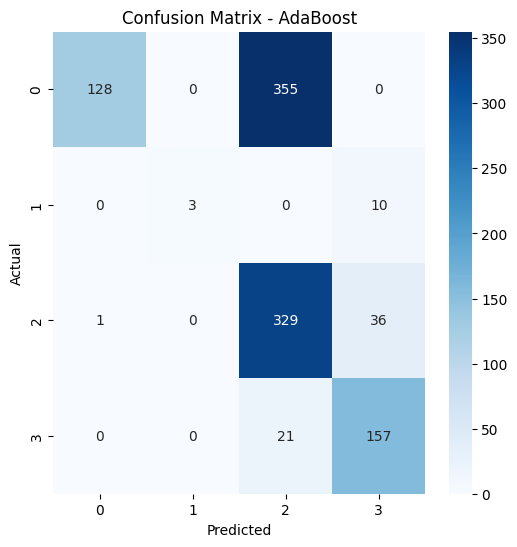

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train AdaBoost model
adaboost = AdaBoostClassifier(random_state=20, n_estimators=50)
adaboost.fit(x_t, y_t)

# Predict and evaluate
y_pred_adaboost = adaboost.predict(x_te)
accuracy_adaboost = accuracy_score(y_te, y_pred_adaboost)
print("AdaBoost Performance")
print(f"Accuracy: {accuracy_adaboost:.4f}")
print("Classification Report:\n", classification_report(y_te, y_pred_adaboost))

# Confusion Matrix
conf_matrix_adaboost = confusion_matrix(y_te, y_pred_adaboost)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


2. Bagging: Train a Model Using Bagging or Random Forest

Bagging:

Bagging Performance
Accuracy: 0.9577
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       483
           1       0.67      0.46      0.55        13
           2       0.95      0.96      0.95       366
           3       0.89      0.89      0.89       178

    accuracy                           0.96      1040
   macro avg       0.87      0.83      0.85      1040
weighted avg       0.96      0.96      0.96      1040



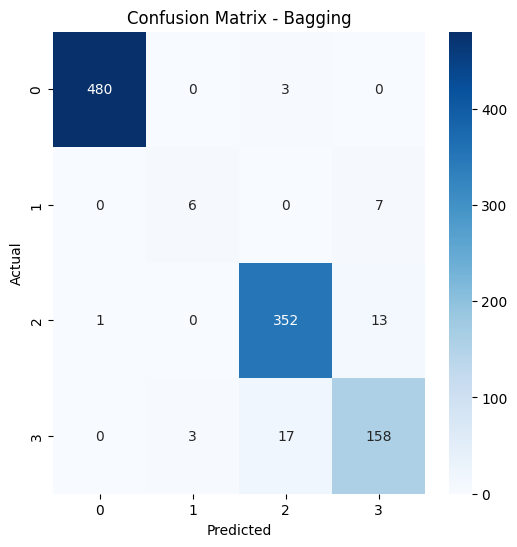

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Train Bagging model
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=20, n_estimators=50)
bagging.fit(x_t, y_t)

# Predict and evaluate
y_pred_bagging = bagging.predict(x_te)
accuracy_bagging = accuracy_score(y_te, y_pred_bagging)
print("Bagging Performance")
print(f"Accuracy: {accuracy_bagging:.4f}")
print("Classification Report:\n", classification_report(y_te, y_pred_bagging))

# Confusion Matrix
conf_matrix_bagging = confusion_matrix(y_te, y_pred_bagging)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_bagging, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Bagging")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest:

Random Forest Performance
Accuracy: 0.9663
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       0.80      0.31      0.44        13
           2       0.95      0.98      0.97       366
           3       0.91      0.90      0.91       178

    accuracy                           0.97      1040
   macro avg       0.92      0.80      0.83      1040
weighted avg       0.97      0.97      0.96      1040



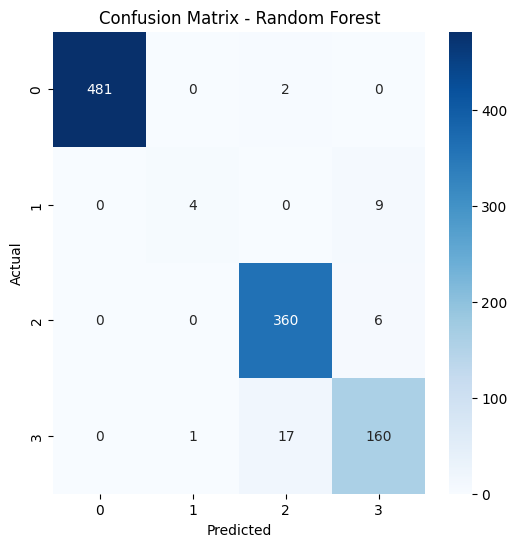

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
random_forest = RandomForestClassifier(random_state=20, n_estimators=100)
random_forest.fit(x_t, y_t)

# Predict and evaluate
y_pred_rf = random_forest.predict(x_te)
accuracy_rf = accuracy_score(y_te, y_pred_rf)
print("Random Forest Performance")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", classification_report(y_te, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_te, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Compare the Performance of Boosting and Bagging

In [ ]:
# Store results for comparison
results = {
    "AdaBoost": {"Accuracy": accuracy_adaboost, "Confusion Matrix": conf_matrix_adaboost},
    "Bagging": {"Accuracy": accuracy_bagging, "Confusion Matrix": conf_matrix_bagging},
    "Random Forest": {"Accuracy": accuracy_rf, "Confusion Matrix": conf_matrix_rf}
}

# Print comparison
print("\nComparison of Boosting and Bagging Performance:")
for method, metrics in results.items():
    print(f"\n{method}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")



Comparison of Boosting and Bagging Performance:

AdaBoost:
Accuracy: 0.5933

Bagging:
Accuracy: 0.9577

Random Forest:
Accuracy: 0.9663



Bagging Results:
Accuracy: 0.9567
ROC-AUC: 0.9858
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       483
           1       0.83      0.38      0.53        13
           2       0.94      0.96      0.95       366
           3       0.88      0.89      0.89       178

    accuracy                           0.96      1040
   macro avg       0.91      0.81      0.84      1040
weighted avg       0.96      0.96      0.96      1040



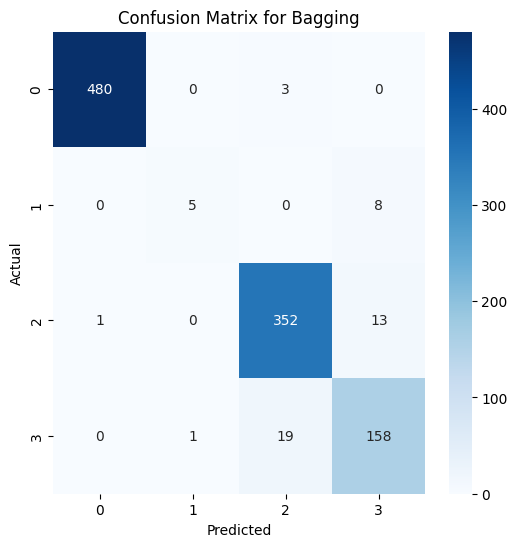

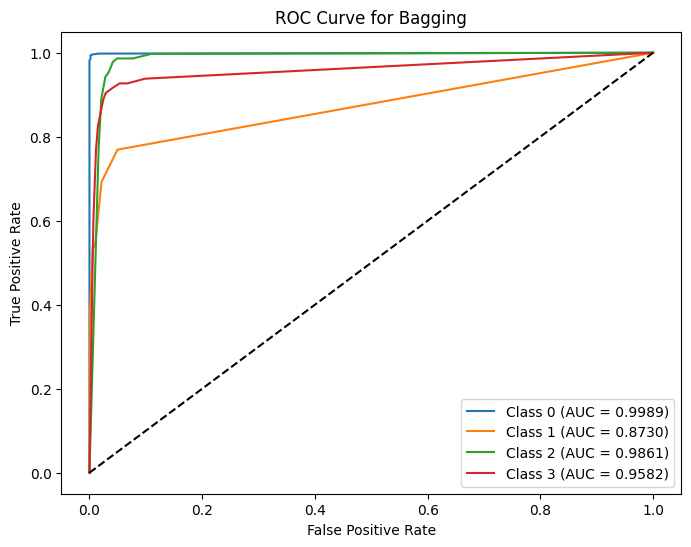


Boosting Results:
Accuracy: 0.5933
ROC-AUC: 0.8971
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.27      0.42       483
           1       1.00      0.23      0.38        13
           2       0.47      0.90      0.61       366
           3       0.77      0.88      0.82       178

    accuracy                           0.59      1040
   macro avg       0.81      0.57      0.56      1040
weighted avg       0.77      0.59      0.56      1040



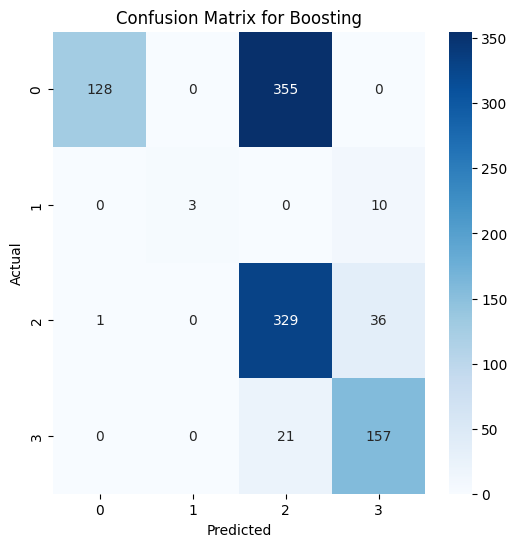

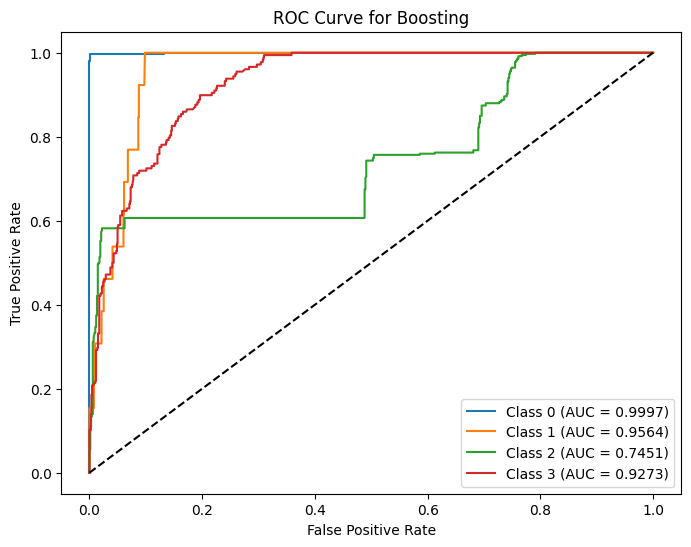


Random Forest Results:
Accuracy: 0.9663
ROC-AUC: 0.9954
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       0.80      0.31      0.44        13
           2       0.95      0.98      0.97       366
           3       0.91      0.90      0.91       178

    accuracy                           0.97      1040
   macro avg       0.92      0.80      0.83      1040
weighted avg       0.97      0.97      0.96      1040



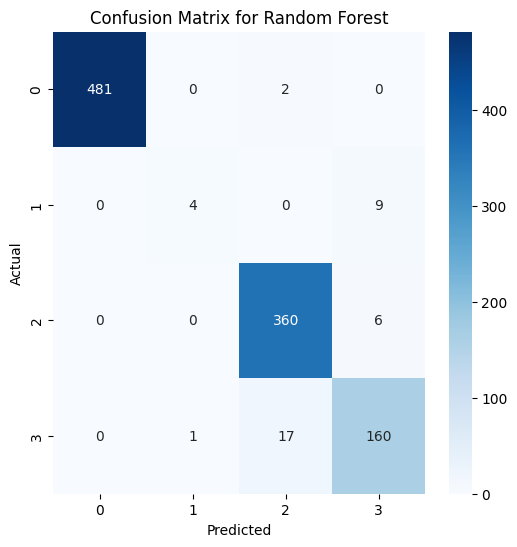

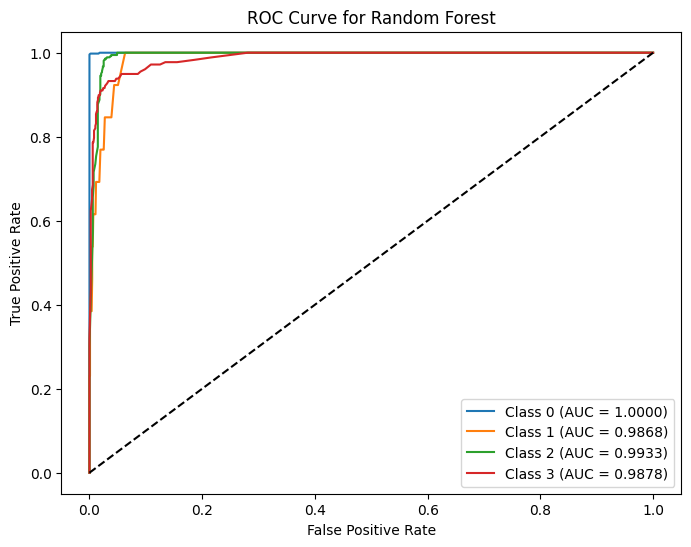

In [ ]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC-AUC calculation
y_te_binarized = label_binarize(y_te, classes=list(set(y_t)))
x_classes = y_te_binarized.shape[1]

# Initialize models
models = {
    "Bagging": BaggingClassifier(random_state=20),
    "Boosting": AdaBoostClassifier(random_state=20),
    "Random Forest": RandomForestClassifier(random_state=20)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(x_t, y_t)

    # Predict probabilities for ROC-AUC calculation
    y_proba = model.predict_proba(x_te)

    # Predict the labels
    y_pred = model.predict(x_te)

    # Calculate accuracy
    accuracy = accuracy_score(y_te, y_pred)

    # Generate classification report
    class_report = classification_report(y_te, y_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_te, y_pred)

    # Calculate ROC-AUC
    if x_classes > 2:  # Multi-class ROC-AUC
        roc_auc = roc_auc_score(y_te_binarized, y_proba, average="weighted", multi_class="ovr")
    else:  # Binary ROC-AUC
        roc_auc = roc_auc_score(y_te, y_proba[:, 1])

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Classification Report:\n", class_report)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(set(y_t)), yticklabels=list(set(y_t)))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    if x_classes > 2:
        for i in range(x_classes):
            fpr, tpr, _ = roc_curve(y_te_binarized[:, i], y_proba[:, i])
            plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc(fpr, tpr):.4f})")
    else:
        fpr, tpr, _ = roc_curve(y_te, y_proba[:, 1])
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.show()
